In [106]:
import pandas as pd
import geopandas
from shapely.geometry import Point
from shapely.ops import nearest_points
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [5]:
stations = geopandas.read_file('C:/Users/nicol/Documents/FareEvasion/Subway Stations/geo_export_d1cef8bd-bb80-491b-983e-fc4b3e3aab4f.shp')

In [6]:
census_tracts = geopandas.read_file('2010 Census Tracts/geo_export_8c891443-d61f-458c-92d2-d7fc5521412d.shp')

In [45]:
unary = census_tracts.geometry.centroid.unary_union

def nearest_censustract(point, pts=unary):
     # find the nearest tract centroid and return it and the corresponding distance to that tract
    nearest = census_tracts.geometry.centroid == nearest_points(point, pts)[1]
    
    
    longs = census_tracts[nearest].iloc[0].geometry.centroid.x
    lats = census_tracts[nearest].iloc[0].geometry.centroid.y
    longp = point.x
    latp = point.y
    
    return [census_tracts[nearest].iloc[0], haversine(longs, lats, longp, latp)]


def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in km. Use 3956 for miles
    
    return c * r *1000 #convert to m

In [81]:
census_tracts

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...
...,...,...,...,...,...,...,...,...,...,...,...,...
2160,2,2025100,Bronx,E,025100,251,BX36,University Heights-Morris Heights,3707,2.255161e+06,6288.049531,POLYGON ((-73.90486847215521 40.85869322470882...
2161,4,4008800,Queens,I,008800,88,QN56,Ozone Park,4113,4.705165e+06,9332.995765,POLYGON ((-73.83334819203354 40.66677318701445...
2162,4,4088400,Queens,I,088400,884,QN57,Lindenwood-Howard Beach,4113,1.666724e+07,39415.953966,(POLYGON ((-73.83032725337064 40.6551328058033...
2163,1,1005600,Manhattan,I,005600,56,MN13,Hudson Yards-Chelsea-Flatiron-Union Square,3807,1.878254e+06,5723.840786,POLYGON ((-73.98407485260152 40.74332471841657...


In [87]:
def county_code(boro_code):
    if boro_code == 1:
        #manhattan
        return '061'
    if boro_code == 2:
        #bronx
        return '005'
    if boro_code == 3:
        #brooklyn
        return '047'
    if boro_code == 4:
        #queens
        return '081'
    if boro_code == 5:
        #staten island
        return '085'


In [99]:
census_tracts["GEO_ID"] = '1400000US36'+census_tracts.boro_code.astype(int).map(county_code)+census_tracts.ct2010

In [100]:
census_tracts["GEO_ID"]

0       1400000US36085000900
1       1400000US36061009800
2       1400000US36061010000
3       1400000US36061010200
4       1400000US36061010400
                ...         
2160    1400000US36005025100
2161    1400000US36081008800
2162    1400000US36081088400
2163    1400000US36061005600
2164    1400000US36061005800
Name: GEO_ID, Length: 2165, dtype: object

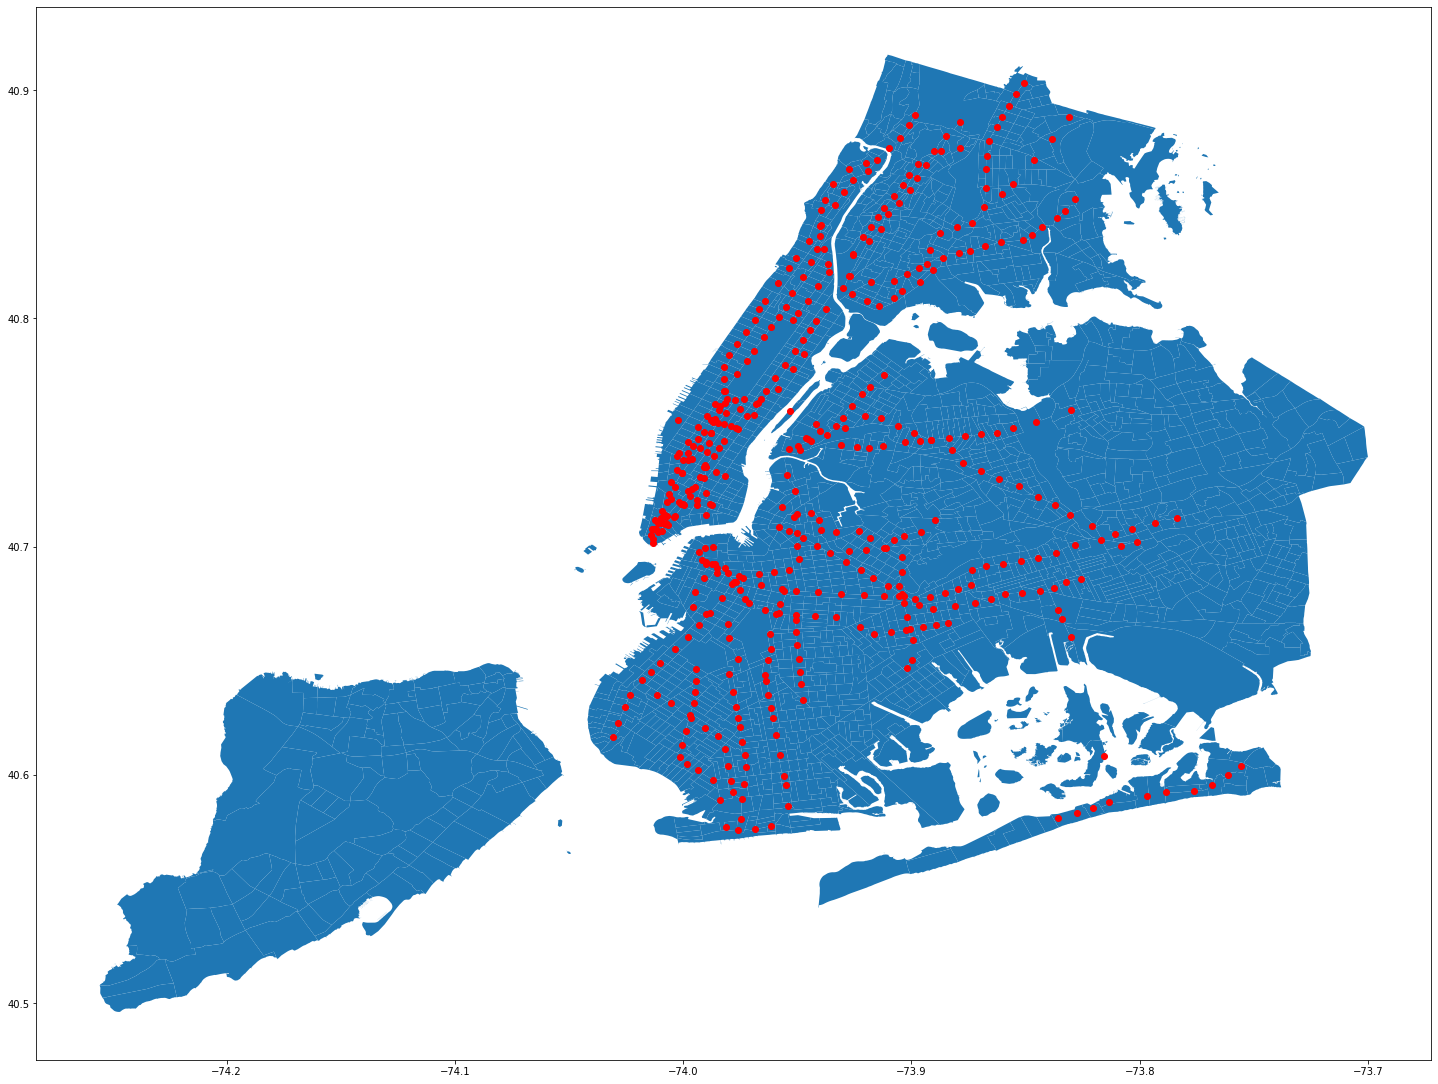

In [17]:
fig, ax = plt.subplots(1,1, figsize=(25,25))

census_tracts.plot(ax = ax)
stations.plot(ax =ax, color='r')

In [46]:
distances = {}
for station in stations.geometry:
    [nt, dist] = nearest_censustract(station)
    nt = nt.ntacode
    
    if nt in distances:
        if distances[nt] > dist:
            distances[nt] = dist
    else:
        distances[nt] = dist

In [47]:
{k: v for k, v in sorted(distances.items(), key=lambda item: item[1])}    

{'MN17': 2.4780248124645614,
 'BK61': 9.087653157074637,
 'BK69': 11.009004100918018,
 'QN26': 12.238658581567327,
 'BK95': 12.37890553626992,
 'BK81': 13.380992231557943,
 'BK34': 15.014275365233923,
 'BK77': 26.54441610625865,
 'MN36': 31.099539178344077,
 'MN34': 39.409184557054324,
 'MN31': 39.74753208833547,
 'BK32': 39.97887241809273,
 'BK44': 45.156312098307346,
 'QN31': 50.72630575694768,
 'BK28': 73.2487239124862,
 'QN10': 74.09552762019035,
 'MN23': 74.67267267083169,
 'QN55': 76.32460599555313,
 'BK88': 76.78372691226626,
 'QN12': 77.50981013778363,
 'BK82': 78.70448695884512,
 'MN24': 80.3441256968047,
 'MN13': 80.79618136078109,
 'MN32': 81.34781685390493,
 'BX05': 81.84944796125689,
 'MN40': 83.06616108497607,
 'QN20': 83.1935722155901,
 'BK37': 86.73091908522888,
 'BK41': 88.8028216755746,
 'QN63': 92.84794996871929,
 'BK17': 93.03988219666019,
 'BK83': 96.91699615077306,
 'QN68': 99.85111663178024,
 'BX40': 99.88738100039164,
 'BK38': 100.27313508977164,
 'BK68': 105.98

In [103]:
def censustracts_within_max_dist(point, maxdist = 600):
    tracts = []
    for index, ct in census_tracts.iterrows():
        cent = ct.geometry.centroid
        dist = haversine(point.x, point.y, cent.x, cent.y)
        if dist < maxdist:
            tracts.append(ct.GEO_ID)
    return tracts

In [104]:
close_tracts = {}
for index, station in stations.iterrows():
    close_tracts[station.objectid] = censustracts_within_max_dist(station.geometry)

In [107]:
with open('Census Tracts within 600m by station.pkl', 'wb') as f:
    pickle.dump(close_tracts, f)

In [113]:
{k: v for k, v in sorted(close_tracts.items(), key=lambda item: len(item[1]))}

{23.0: [],
 99.0: [],
 16.0: ['1400000US36081093800'],
 55.0: ['1400000US36081103201'],
 153.0: ['1400000US36081001900'],
 182.0: ['1400000US36081096400'],
 183.0: ['1400000US36081094201'],
 185.0: ['1400000US36081099200'],
 201.0: ['1400000US36005030000'],
 242.0: ['1400000US36081088400'],
 243.0: ['1400000US36081008800'],
 271.0: ['1400000US36005028500'],
 278.0: ['1400000US36005048400'],
 307.0: ['1400000US36081003100'],
 456.0: ['1400000US36005043100'],
 17.0: ['1400000US36081094202', '1400000US36081094203'],
 66.0: ['1400000US36081001900', '1400000US36081000700'],
 93.0: ['1400000US36081001900', '1400000US36081000700'],
 95.0: ['1400000US36081000700', '1400000US36081000100'],
 101.0: ['1400000US36081000700', '1400000US36081000100'],
 124.0: ['1400000US36081086400', '1400000US36081008800'],
 154.0: ['1400000US36081000700', '1400000US36081000100'],
 181.0: ['1400000US36081097202', '1400000US36081097204'],
 184.0: ['1400000US36081093800', '1400000US36081093402'],
 186.0: ['1400000US3

In [120]:
stations[stations.objectid == 23.0]

,line,name,notes,objectid,url,geometry
22,7-7 Express,Mets - Willets Point,"7-all times, 7 Express-rush hours AM westbound...",23.0,http://web.mta.info/nyct/service/,POINT (-73.8456249984179 40.75462199881262)


In [121]:
stations[stations.objectid == 99.0]

,line,name,notes,objectid,url,geometry
98,A-S,Broad Channel,"A,S to Rockaway Park-all times",99.0,http://web.mta.info/nyct/service/,POINT (-73.81583268782963 40.60840218069683)
